In [1]:
from data_loader import DataLoader
import xgboost as xgb
import pandas as pd
import numpy as np
import os
import sys
from ml_util import *
from sklearn import linear_model

dl = DataLoader('../data/')
x_train, x_valid, x_test, y_train, y_valid, y_test = dl.GetTrainValidTest()

In [2]:
def Filter(x_, y_):
    nan_cond = (~np.isnan(y_)) & (np.isnan(x_).sum(axis=1) == 0)
    inf_cond = (~np.isinf(y_)) & (np.isinf(x_).sum(axis=1) == 0)
    return x_[nan_cond & inf_cond], y_[nan_cond * inf_cond]

x_train, y_train = Filter(x_train, y_train)
x_test, y_test = Filter(x_test, y_test)

In [3]:
# linear model
model = linear_model.ElasticNetCV(alphas=[0.0,0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[0.0, .01, .1, .5, .9, .99, 0.1],  max_iter=5000,  tol=1e-15)
model.fit(x_train, y_train)
print('expr:y=%s*x+%lf, iter=%d' % (str(model.coef_), model.intercept_, model.n_iter_))

/root/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/root/

/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/roo

/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small 

/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


expr:y=[ 0.00000000e+00 -5.57835934e-06  1.85105119e-04  5.76551141e-05
  2.21683446e-05 -3.41828759e-05 -0.00000000e+00 -9.05481321e-06
 -5.75266743e-06  9.10314641e-06  8.29921638e-05  1.03851967e-05
  0.00000000e+00 -3.25109567e-06  5.35141630e-06  1.95038959e-06
  5.81252655e-05  2.72533253e-05 -1.01079102e-05 -0.00000000e+00
 -1.00883970e-05  1.21797260e-05 -1.06299186e-05 -1.40812976e-05
  2.95084992e-05 -4.12570374e-04 -2.15346932e-04 -8.96279057e-04
  7.24173841e-04  1.90330245e-05  2.40369425e-04  0.00000000e+00
  8.46065828e-05 -3.23154737e-05 -0.00000000e+00 -4.69176591e-05
  1.76092964e-05 -1.24964234e-05 -0.00000000e+00  2.27119494e-04
  1.15446586e-04  6.91421720e-05  8.20191429e-06  2.73729881e-06
 -1.51837181e-04  7.20497196e-05  0.00000000e+00  2.01286591e-05
  1.75680760e-05  6.40716471e-06  4.13630082e-06  1.34757839e-05
  4.01893015e-05 -1.19972176e-05  3.53567142e-06  2.77255595e-05
 -1.11518495e-06 -2.51414233e-06 -2.51690400e-05  6.26766707e-06
  4.52565374e-05  

/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Confusion matrix, without normalization


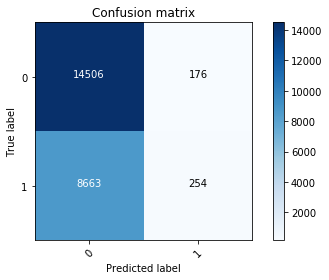

              precision    recall  f1-score   support

      class0       0.63      0.99      0.77     14682
      class1       0.59      0.03      0.05      8917

   micro avg       0.63      0.63      0.63     23599
   macro avg       0.61      0.51      0.41     23599
weighted avg       0.61      0.63      0.50     23599



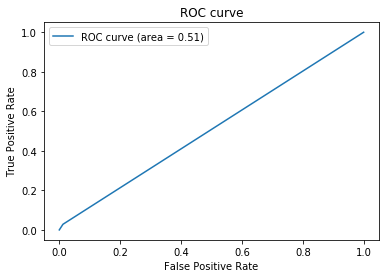

In [4]:
y_pred = model.predict(x_test)
ClsReport(model, y_test>0, y_pred>0, binary=True)

In [5]:
model.__dict__

{'alpha_': 0.0001,
 'alphas': [0.0, 0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10],
 'alphas_': array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 5.e-04, 1.e-04, 0.e+00]),
 'coef_': array([ 0.00000000e+00, -5.57835934e-06,  1.85105119e-04,  5.76551141e-05,
         2.21683446e-05, -3.41828759e-05, -0.00000000e+00, -9.05481321e-06,
        -5.75266743e-06,  9.10314641e-06,  8.29921638e-05,  1.03851967e-05,
         0.00000000e+00, -3.25109567e-06,  5.35141630e-06,  1.95038959e-06,
         5.81252655e-05,  2.72533253e-05, -1.01079102e-05, -0.00000000e+00,
        -1.00883970e-05,  1.21797260e-05, -1.06299186e-05, -1.40812976e-05,
         2.95084992e-05, -4.12570374e-04, -2.15346932e-04, -8.96279057e-04,
         7.24173841e-04,  1.90330245e-05,  2.40369425e-04,  0.00000000e+00,
         8.46065828e-05, -3.23154737e-05, -0.00000000e+00, -4.69176591e-05,
         1.76092964e-05, -1.24964234e-05, -0.00000000e+00,  2.27119494e-04,
         1.15446586e-04,  6.91421720e-05,  8.20191429e-06,  2.737298